In [1]:
# import sys
# !{sys.executable} -m pip install h5py

In [2]:
import h5py
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd

In [3]:
# #TUTORIAL1
# import numpy as np

# matrix1 = np.random.random(size=(1000,1000))
# matrix2 = np.random.random(size=(1000,100))

# with h5py.File(r'C:\Users\Richard\Desktop\Summer20\hdf5_data.h5', 'w') as hdf:
#     hdf.create_dataset('ds1', data=matrix1)
#     hdf.create_dataset('ds2', data=matrix2)

In [4]:
# #TUTORIAL2
# with h5py.File(r'C:\Users\Richard\Desktop\Summer20\hdf5_data.h5', 'r') as hdf:
#     ls = list(hdf.keys())
#     print('list of datasets:',ls)
#     data = hdf.get('ds1')
#     dataset1 = np.array(data)
#     print('shape of ds1:',dataset1.shape)
# dataset1

In [5]:
#REAL DATA

filename = "prediction_values130_from100.hdf5" 
f = h5py.File(filename, 'r')
ls = list(f.keys())
print(ls)

['Y_predicted', 'Y_test_use']


In [6]:
Y_pred = f.get('Y_predicted')
Y_pred_arr = np.array(Y_pred)
print(Y_pred_arr)
print("Shape of prediction array is:",Y_pred_arr.shape)

[[0.56282866]
 [1.4788425 ]
 [0.41716197]
 ...
 [0.40085894]
 [1.6144621 ]
 [0.4649277 ]]
Shape of prediction array is: (82274, 1)


In [7]:
Y_test = f.get('Y_test_use')
Y_test_arr = np.array(Y_test)
print(Y_test_arr)

[[ 0.4119359   0.3516154   0.8124185  ... 14.          1.
   1.        ]
 [ 0.94737625  0.0544763   1.6872201  ... 14.          0.
   1.        ]
 [ 0.3789892   0.05468129  0.         ... 12.          0.
   1.        ]
 ...
 [ 0.40877926 -0.8701986   0.         ... 12.          0.
   1.        ]
 [ 0.9613775  -0.64704305  1.3266437  ... 14.          1.
   1.        ]
 [ 0.14396195  0.93052197  0.         ... 12.          1.
   1.        ]]


In [8]:
print("shape of Y_test_use array is:", Y_test_arr.shape)

shape of Y_test_use array is: (82274, 12)


In [9]:
# print(list(Y_test.keys()))
# print(list(Y_pred.keys()))

In [10]:
#accessing 8th column of Y_test_use
Y_test_col = Y_test_arr[:,8]

print(Y_test_col)
print(Y_test_col.shape)

[1. 1. 0. ... 0. 1. 0.]
(82274,)


# CONVERT TO BINARY BASED ON THRESHOLD ARRAY (SKLEARN.ROC_CURVE)

In [11]:
#changing predicted output to binary


# Y_pred_bin = np.array([])

# for i in range(0,82274):
#     if Y_pred_arr[i] >= 0.4625:
#         Y_pred_bin = np.append(Y_pred_bin,1)
#     elif Y_pred_arr[i] < 0.4625:
#         Y_pred_bin = np.append(Y_pred_bin, 0)
#     else:
#         print('error')

# print(Y_pred_bin.shape)
# print(Y_pred_bin)

In [12]:
n=0

for i in range(0,82274):
    if Y_pred_bin[i] == Y_test_col[i]:
        n += 1 

print(n)
print(n/82274)

NameError: name 'Y_pred_bin' is not defined

In [13]:
#Plotting ROC curve
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# import scikitplot as skplt

# y_true = Y_test_col
# y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()



 False Positive. Predict an event when there was no event. (predicting 1 when actually 0)
 False Negative. Predict no event when in fact there was an event.(predicting 0 when actually 1)

 It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis)
 for a number of different candidate threshold values between 0.0 and 1.0. Put another way,
 it plots the false alarm rate versus the hit rate.
 
 True Positive Rate = True Positives / (True Positives + False Negatives)
 
 False Positive Rate = False Positives / (False Positives + True Negatives)

In [14]:
# Y_test_col[41]
# for i in range(0,82274):
#     if Y_test_col[i] == 1:
#         Y_test_col[i] = True
#     else:
#         Y_test_col[i] = False
# print(Y_test_col)

In [15]:
fpr, tpr, thresholds = roc_curve(Y_test_col, Y_pred_arr)
print(fpr ,'\n \n', tpr,'\n \n', thresholds)

[0.         0.         0.         ... 0.99997581 0.99997581 1.        ] 
 
 [0.00000000e+00 2.44319570e-05 4.66406059e-02 ... 9.99975568e-01
 1.00000000e+00 1.00000000e+00] 
 
 [ 1.5076688e+01  1.4076688e+01  1.2108037e+00 ... -2.1520538e+02
 -3.4101544e+02 -4.2790386e+03]


In [16]:
auc = roc_auc_score(Y_test_col, Y_pred_arr)
print('AUC: %.3f' % auc)
print(auc)

AUC: 0.724
0.7236639355594843


[0.         0.         0.         ... 0.99997581 0.99997581 1.        ] [0.00000000e+00 2.44319570e-05 4.66406059e-02 ... 9.99975568e-01
 1.00000000e+00 1.00000000e+00]
34225
0.7236639355594843


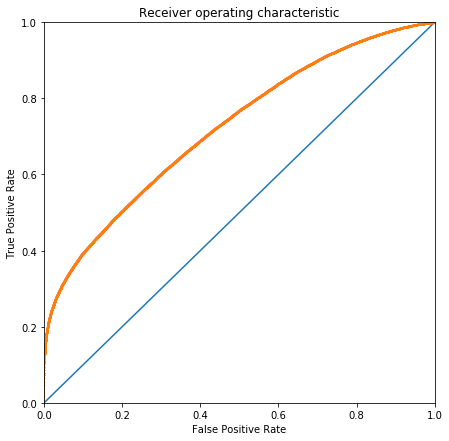

In [18]:

fpr, tpr, thresholds = roc_curve(Y_test_col, Y_pred_arr)
print(fpr,tpr)
# roc_auc = auc(fpr, tpr)
print(len(thresholds))

print (roc_auc_score(Y_test_col, Y_pred_arr))


plt.figure(figsize=(7,7))

x_noskill=np.linspace(0,1,50)
y_noskill=np.linspace(0,1,50)

plt.plot(x_noskill,y_noskill)
plt.plot(fpr, tpr, marker='.', markersize=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.show()




In [19]:
#import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
print(Y_pred_arr.shape)
Y_pred_bin = np.array([])
for i in range(0,393853):
    if Y_pred_arr[i] <0.45:
        Y_pred_bin = np.append(Y_pred_bin, False)
    elif Y_pred_arr[i] >= 0.45:
        Y_pred_bin = np.append(Y_pred_bin,True)

print(Y_pred_bin.shape)
print(Y_test_col.shape)
# normalize:{'true', 'pred','all'}
# type(normalize)

conf_mat = sklearn.metrics.confusion_matrix(Y_test_col, Y_pred_bin)
# cm = conf_mat
# conf_mat = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(conf_mat)
auc = roc_auc_score(Y_test_col, Y_pred_arr)
print('AUC: %.3f' % auc)
print(auc)

(82274, 1)


IndexError: index 82274 is out of bounds for axis 0 with size 82274

In [ ]:
# tn, fp, fn, tp = confusion_matrix(Y_test_col, Y_pred_bin).ravel()
# tn, fp, fn, tp

# conf_array = [tn, fp, fn, tp]
# normed_conf = conf_array / np.linalg.norm(conf_array)
# # norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
# print(normed_conf)

In [ ]:


data = {'Y_test_col':Y_test_col, 'Y_pred_bin':Y_pred_bin}
df = pd.DataFrame(data, columns=['Y_test_col', 'Y_pred_bin'])
confusion_matrix = pd.crosstab(df['Y_test_col'], df['Y_pred_bin'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
# normed_conf = confusion_matrix
# normed_conf_2d = [[normed_conf[0], normed_conf[1]], [normed_conf[2],normed_conf[3]]]
# print(normed_conf_2d)
sns.heatmap(conf_mat, cmap = 'YlGnBu')

plt.tight_layout()
plt.show()
conf_mat


# Normalize as vector or should the array elements sum to 1?

In [20]:
def create_bin_arr(num, ran = np.array([0,1])):
    
    bins = np.array([])
    n = 0
    add = np.max(ran)/num
    
    for i in range(num+1):
        bins = np.append(bins, n)
        n += add
    
    return bins

bins = create_bin_arr(40,[0,1])
print(bins)

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ]


Text(0, 0.5, 'freq')

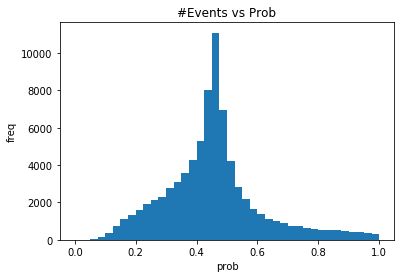

In [21]:
plt.hist(Y_pred_arr, bins = bins,  range = (0,1))
plt.title('#Events vs Prob')
plt.xlabel('prob')
plt.ylabel('freq')

In [22]:
# #Attempting to change threshhold 

# Y_pred_bin = np.array([])

# for i in range(0,82274):
#     if Y_pred_arr[i] > 0.5:
#         Y_pred_bin = np.append(Y_pred_bin,1)
#     elif Y_pred_arr[i] <= 0.5:
#         Y_pred_bin = np.append(Y_pred_bin, 0)
#     else:
#         print('error')

# print(Y_pred_bin.shape)
# print(Y_pred_bin)

# n=0
# for i in range(0,82274):
#     if Y_pred_bin[i] == Y_test_col[i]:
#         n += 1 
# print(n)
# print(n/82274)


# # tn, fp, fn, tp = confusion_matrix(Y_test_col, Y_pred_bin).ravel()
# # tn, fp, fn, tp

# conf_array = [tn, fp, fn, tp]
# normed_conf = conf_array / np.linalg.norm(conf_array)
# # norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
# print(normed_conf)

 Points of discussion: 
1) Does the sklearn function, confusion_matrix, assign a thresshold on its own or does it use 0.5?
 2) Separating the peaks
 3) for conf_mat elements, Normalize as vector or should the array elements sum to 1?
4) Map epochs-validation loss graph- how
5) Training the network reports 3 different loss values. Training on 1 variable so 1 loss expected. Reason for discrepancy?  




In [23]:
import h5py
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def plot_testonly(start, end, ROC = True, confusion_matrix = False, ):
    
    n_array = np.array([])
    roc_nums_array = np.array([])
    auc_array = np.array([])
    
    for i in range(int(start), int(end)):
        epoch = str(2*i)
        filename = "prediction_values%s.hdf5"%(epoch)
        f = h5py.File(filename, 'r')
        ls = list(f.keys())
        print(ls)
        
        Y_pred = f.get('Y_predicted')
        Y_pred_arr = np.array(Y_pred)
        
        Y_test = f.get('Y_test_use')
        Y_test_arr = np.array(Y_test)
        Y_test_col = Y_test_arr[:,8]
        
#         n=0
#         for i in range(0,82274):
#             if Y_pred_bin[i] == Y_test_col[i]:
#                 n += 1 
#         n_array = np.append(n_array, n)
        
        fpr, tpr, thresholds = roc_curve(Y_test_col, Y_pred_arr)
        roc_nums = np.array([fpr, tpr, thresholds])
        roc_nums_array = np.append(roc_nums_array, roc_nums)
        auc = roc_auc_score(Y_test_col, Y_pred_arr)
        auc_array = np.append(auc_array, auc)
        
        if ROC == True:
            roc_plot = plt.figure(figsize=(7,7))

            x_noskill=np.linspace(0,1,50)
            y_noskill=np.linspace(0,1,50)

            plt.plot(x_noskill,y_noskill)
            plt.plot(fpr, tpr, marker='.', markersize=1)

            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC at %s epochs'%(epoch))
            plt.savefig('ROC%s.png'%(epoch))
            plt.close()
            
        #CONVERT TO BINARY BASED ON THE THRESHOLD ARRAY
        if confusion_matrix == True:
            conf_mat = sklearn.metrics.confusion_matrix(Y_test_col, Y_pred_bin)
            conf_mat
            data = {'Y_test_col':Y_test_col, 'Y_pred_bin':Y_pred_bin}
            df = pd.DataFrame(data, columns=['Y_test_col', 'Y_pred_bin'])
            confusion_matrix = pd.crosstab(df['Y_test_col'], df['Y_pred_bin'], rownames=['Actual'], colnames=['Predicted'])
            print(confusion_matrix)
            confmat_plot = sns.heatmap(confusion_matrix, annot=True, cmap = 'YlGnBu')
        
        print(epoch)          

    return n_array, roc_nums_array, auc_array

In [24]:
ar1, ar2, ar3 = plot_testonly(1,78)

OSError: Unable to open file (unable to open file: name = 'prediction_values2.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [25]:
n_array = ar1
roc_nums_array = ar2
auc_array = ar3

print(np.max(auc_array))
print(np.argmax(auc_array)+1)


NameError: name 'ar1' is not defined

In [26]:
auc_array

NameError: name 'auc_array' is not defined

In [27]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(2,154, 77), auc_array)
plt.xlabel('Epochs')
plt.ylabel('Area Under Curve')
plt.title('AUC vs Epochs')

NameError: name 'auc_array' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.plot(np.linspace(2,154,77), auc_array)

In [1]:
if 1<=2:
    print('yes')

yes


In [3]:
n=4
for i in range(1,n+1):
    print(i)

1
2
3
4


In [13]:
print('X_test_use_%'%n)

SyntaxError: EOL while scanning string literal (<ipython-input-13-6aff83baba93>, line 1)